# __1-2. Regression Overview: Assumption__

## 이번 수업의 목표

1. 회귀분석의 기본 가정을 안다.
2. 회귀분석의 기본 과정을 안다.
3. 회귀분석의 모델 설정 과정을 안다.
4. 회귀분석의 모수 추정 과정을 안다.

## 1. 회귀분석의 표준 가정

모든 통계적, 혹은 수리적 분석 과정에서 그러하듯이 회귀분석을 진행할 때에도 여러가지 가정을 깔고 시작하게 된다. 물론 이러한 가정들이 실제 회귀 분석에서 완벽히 적용되기는 어렵기 때문에, 고려해야하나 싶을 수 있다. 하지만 이러한 기본적인 가정사항에 근거하여 모델을 설정하며, 이후 도입되는 여러 테크닉이나 모델들의 motivation을 이해하는데에도 큰 도움이 되기 때문에 눈여겨 보는 것이 좋다.

다음은 회귀분석의 표준 가정이다. (참고로 회귀분석의 가정은 다루는 곳마다 다르다. 그래도 보통 회귀분석을 할 때 가장 많이 하는 가정 4가지를 적어보았다.)

1. __Homoscedasticity__: 오차항은 모든 X값에 대하여 동일한 분산을 갖는다.

2. __Mean Zero Error__: 오차항의 평균은 0이다. 좀 더 강화하여 오차항이 평균이 0인 정규분포를 이루어야 한다는 Normality 가정을 사용하기도 한다.

3. __Independence of Error__: 오차항과 독립변수 사이에는 상관관계가 없어야 한다.

4. __Nomulticolinearity__: 독립변수 상호간에는 상관관계가 없어야 한다.

 
### 분석시 유의점

(1) 회귀분석에서 가장 중요한 문제 가운데 하나는 다중공선성의 문제로서 다중공선성의 문제를 해결하기 위해서는 유의하지 않은 변수를 제거한 다음에 다시 회귀분석을 실시하는 것이 바람직하다.<br />
(2) 대부분의 기계학습 모델에서 오차항의 Normality가 없을 때 성능이 떨어지는 문제가 발생한다. 따라서 이를 보완하는 모델을 사용하거나, 데이터의 Mean Zero Error 가정이 아닌 Normality 가정을 사용하는 것이 좋다.

여러 표준 가정중에서 체크하기가 좀 더 까다롭고 중요도가 높은 Homoscedasticity와 Nomulticolinearity를 좀 더 살펴보도록 하자.

### 1-1. Homoscedasticity 체크하기

Homoscedasticity(등분산성)는 모든 확률 변수가 같은 분산을 가지는 성질을 의미한다. 이를 회귀분석에 적용하면, Homoscedasticity 조건은 오차항들이 모두 동일한 분산을 갖는다는 것이다. 즉, 각각의 독립변수에 대하여 오차항들의 분산이 동일하다는 것이다. 회귀분석에서 가장 중요한 가정 중 하나로, Homoscedasticity를 만족하지 않은 데이터에 회귀분석을 진행하면 낮은 performance를 얻을 확률이 커진다.

데이터의 Homoscedasticity를 체크하기 위해서는 각각의 독립변수에 따라서 잔차의 분포에 큰 변화가 없어야한다. 이를 쉽게 확인하는 방법은 독립변수-잔차 산점도(scatter plot)을 그려보는 것이다. 만약 데이터가 Homoscedasticity를 만족한다면 산점도에서 특별한 패턴을 찾기 힘들다. 하지만 아래의 예시와 같이 산점도에서 패턴을 쉽게 발견할 수 있다면 Homoscedasticity를 만족시키지 않는다고 볼 수 있다.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
%matplotlib inline

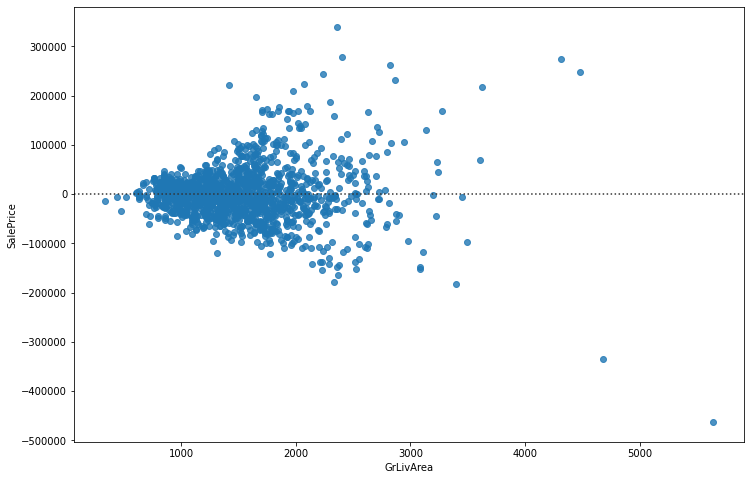

In [16]:
# Load DataSet (from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)
trainData = pd.read_csv('./house-prices-advanced-regression-techniques-train.csv')
plt.subplots(figsize = (12,8))
sns.residplot(trainData.GrLivArea, trainData.SalePrice);

### 1-2. NoMulticolinearity 체크하기

NoMulticolinearity(다중공선성 없음)는 독립변수들 사이에 상관관계가 없거나 약하다는 조건이다. 다중공선성은 회귀분석의 정확도에 큰 영향을 미치기 때문에 분석 전에 반드시 체크하고, 데이터가 다중공선성을 보인다면 이를 해결하고 진행해야한다.

다중공선성을 체크하는 대표적인 방법에는 2가지가 있다. 

1) Scatter Plot을 통해 조금은 주관적인 판단을 하는 방법 <br />
2) VIF(Variance Inflation Factors, 분산팽창요인)을 통해 정량적으로 판단하는 방법

산점도(Scatter Plot)을 사용하여 확인하는 방법은 단순하다. 각 독립변수별 산점도를 만들어 상관관계가 강하게 있는지 판단하면 된다. 이는 조금 주관적일 수 있는 방법이기 때문에 정량적인 방법으로 VIF를 확인한다. 보통 10을 넘으면 다중공선성이 있다고 판단하고 조치를 취하게 된다.

아래 예시를 보자.
데이터는 R의 기본 데이터는 crab.csv(게의 여러 정보를 측정한 것)이다.

각각의 변수에 대하여 scatter plot을 구하면 아래의 그래프를 얻을 수 있다. 열심히 살펴보면 weight ~ sat과 width ~ sat에는 아주 미묘한 상관관계가 있어보이고, width ~ weight에는 조금 많이 강한 상관관계가 있어 보인다. 이를 정량적으로 알기 위해서 실제로 VIF를 구해보면 아래와 같이 나온다. width와 weight의 상관관계가 강하기 때문에 두 변수의 VIF가 크게 나온 것을 확인할 수 있다.

VIF(sat) : 1.158837 <br />
VIF(width) : 4.801679  <br />
VIF(weight) : 4.688660 <br />

__이와 관련된 더욱 이론적이고 자세한 내용은 이후에 다루도록 한다.__

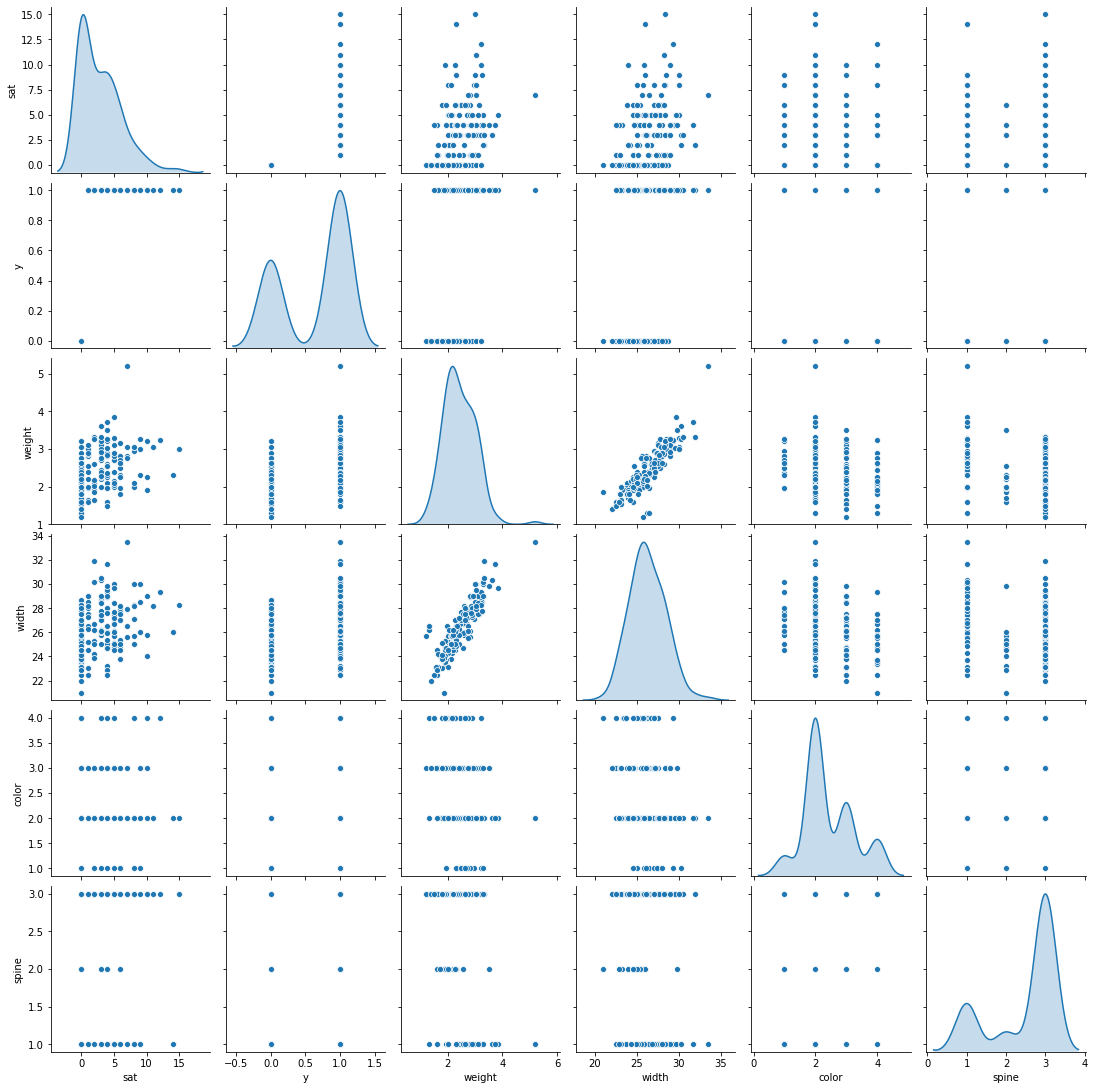

In [13]:
crab_info = pd.read_csv('./crab_info.csv')
sns.pairplot(crab_info, 
             diag_kind='kde', 
             palette='bright')

plt.show()

In [19]:
model = ols('y ~ sat + weight + width', crab_info)

print(variance_inflation_factor(model.exog, 1))
print(variance_inflation_factor(model.exog, 2))
print(variance_inflation_factor(model.exog, 3))

1.15883687808578
4.8016794240392375
4.688660343641888
